In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [2]:
data = []
with open("yelp_academic_dataset_review.json", "r", encoding = 'utf-8') as f:
    for i, line in enumerate(f):
        if i >= 120000:
            break
        data.append(json.loads(line))
df = pd.DataFrame(data) 


In [3]:
review_df = df[['stars', 'text']].astype({'stars': int})
review_df

,stars,text
0,3,"If you decide to eat here, just be aware it is..."
1,5,I've taken a lot of spin classes over the year...
2,3,Family diner. Had the buffet. Eclectic assortm...
3,5,"Wow! Yummy, different, delicious. Our favo..."
4,4,Cute interior and owner (?) gave us tour of up...
...,...,...
119995,5,"The staff is always friendly, and it's a very ..."
119996,1,So I use to go to this place back in 2005 with...
119997,4,I wasn't expecting much from the place when we...
119998,1,Just moved to Gulfport and I am trying out all...


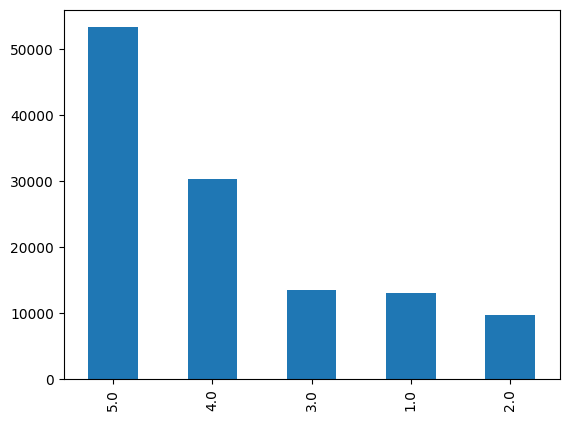

In [4]:
# inspect distribution of classes
df['stars'].value_counts().plot(kind='bar')
plt.show()

In [5]:
# randomly sample from each class based on how many samples the minority class holds
seed = 42
minority_class_count = len(review_df[review_df.loc[:, ('stars')] == 2])
review_df = review_df.groupby('stars').apply(lambda x: x.sample(n=minority_class_count, random_state=seed)).reset_index(drop=True)
review_df

,stars,text
0,1,I went to upgrade my iPhone 7 which is only a ...
1,1,***DONT WASTE YOUR $$$***\nIf I could give neg...
2,1,Staff are absolutely the worst!! Rude and don'...
3,1,My partner and I went there for brunch today. ...
4,1,Awful. Awful. Awful.\n\nThe receptionist barel...
...,...,...
48480,5,"Excellent Sushi, Great Service, and wonderful ..."
48481,5,The WOW factor is here!!!! A gem in the vall...
48482,5,I was suspicious of the quality of yet another...
48483,5,Great place to stop while driving up the Pacif...


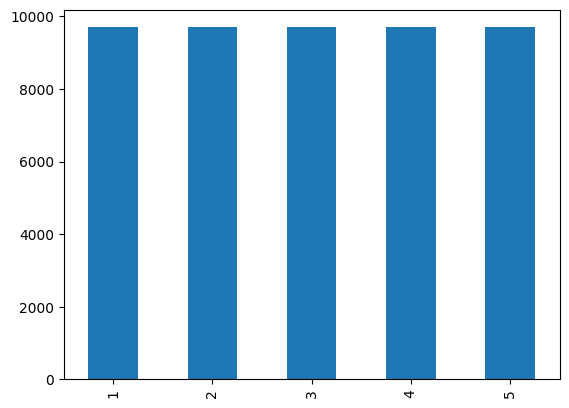

In [6]:
# inspect distribution of classes
review_df['stars'].value_counts().plot(kind='bar')
plt.show()

In [7]:
#cleaning the data set before multinomial
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_message(message):
    stopword = stopwords.words('english')
    message = message.lower()
    message = re.sub(r"http\S+", "", message)
    message = re.sub(r"www.\S+", "", message)
    message_links_removed = "".join([char for char in message if char not in string.punctuation])
    message_cleaned = " ".join([word for word in re.split('\W+', message_links_removed)
        if word not in stopword])
    wn = nltk.WordNetLemmatizer() 
    message = " ".join([wn.lemmatize(word) for word in re.split('\W+', message_cleaned)])
    return message

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sean\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sean\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
for review in review_df['text']:
    clean_message(review)

In [9]:
'''
Using count vectorizer and tdidf without implementing N-Grams
'''

'\nUsing count vectorizer and tdidf without implementing N-Grams\n'

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(review_df['text'])
print(x.shape)

(48485, 50528)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdidf = TfidfVectorizer()
xt = tdidf.fit_transform(review_df['text'])

In [17]:
from sklearn.model_selection import train_test_split 
y = review_df['stars']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(force_alpha=True)
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print('Count Vectorizer Multinomial Naive Bayes', accuracy_score(y_test, y_pred))

Count Vectorizer Multinomial Naive Bayes 0.5362483242239868


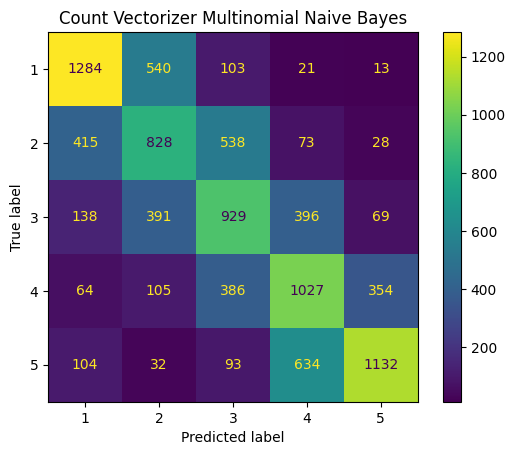

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conmat = confusion_matrix(y_test,y_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('Count Vectorizer Multinomial Naive Bayes')
plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(xt,y, test_size=.2, random_state=42)

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(force_alpha=True)
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print('TFIDF Multinomial Naive Bayes Accuracy: ', accuracy_score(y_test, y_pred))

TFIDF Multinomial Naive Bayes Accuracy:  0.520367123852738


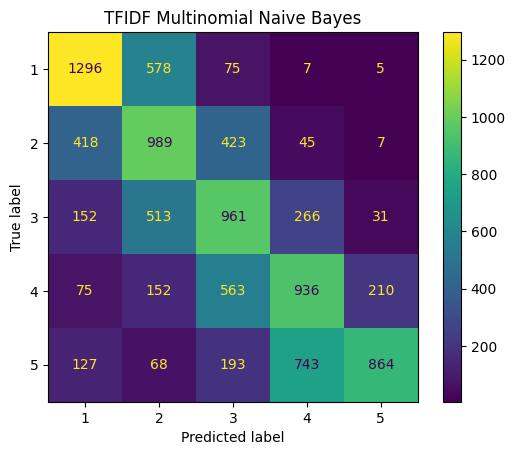

In [17]:
conmat = confusion_matrix(y_test,y_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('TFIDF Multinomial Naive Bayes')
plt.show()

In [18]:
'''
Using count vectorizer and tdidf with n-grams
'''

'\nUsing count vectorizer and tdidf with n-grams\n'

In [19]:

vectorizer = CountVectorizer(ngram_range=(1,5))
x = vectorizer.fit_transform(review_df['text'])

tdidf = TfidfVectorizer(ngram_range=(1,5))
xt = tdidf.fit_transform(review_df['text'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [21]:
mnb = MultinomialNB(force_alpha=True)
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print('5-Gram Count Vectorizer Multinomial Naive Bayes Accuracy: ', accuracy_score(y_test, y_pred))

5-Gram Count Vectorizer Multinomial Naive Bayes Accuracy:  0.5327420851809838


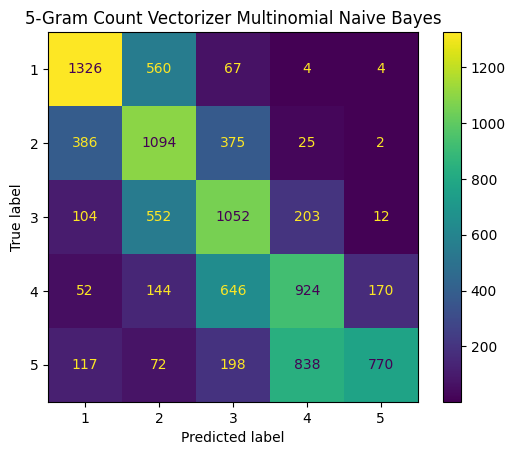

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conmat = confusion_matrix(y_test,y_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('5-Gram Count Vectorizer Multinomial Naive Bayes')
plt.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(xt,y, test_size=.2, random_state=42)

In [24]:
mnb = MultinomialNB(force_alpha=True)
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print('TFIDF Multinomial Naive Bayes Accuracy: ', accuracy_score(y_test, y_pred))

TFIDF Multinomial Naive Bayes Accuracy:  0.5434670516654635


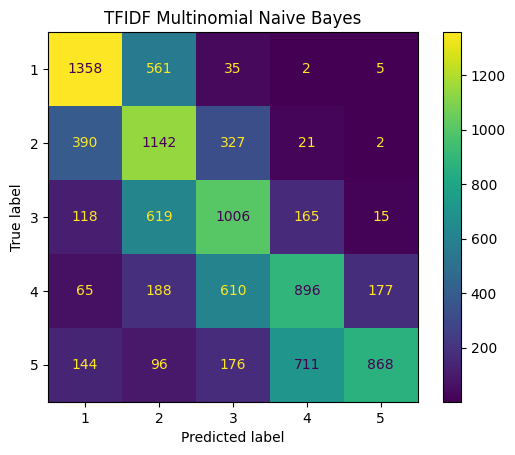

In [25]:
conmat = confusion_matrix(y_test,y_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('TFIDF Multinomial Naive Bayes')
plt.show()

In [26]:
'''
L2 Logistic Regression
'''

'\nL2 Logistic Regression\n'

In [14]:
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [28]:
vectorizer = CountVectorizer(ngram_range=(1,3))
x = vectorizer.fit_transform(review_df['text'])

tdidf = TfidfVectorizer(ngram_range=(1,3))
xt = tdidf.fit_transform(review_df['text'])

wtv = Word2Vec(sentences = review_df['text'], vector_size=300, window=10, min_count=1)

In [29]:
'''
count vectorizer implementation
'''

'\ncount vectorizer implementation\n'

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)
logreg = LogisticRegression(max_iter = 1500, multi_class = 'multinomial')
logreg.fit(x_train, y_train)
cv_pred = logreg.predict(x_test)

In [31]:
'''
tfidf implementation
'''

'\ntfidf implementation\n'

In [32]:
x_train, x_test, y_train, y_test = train_test_split(xt,y, test_size=.2, random_state=42)
logreg = LogisticRegression(max_iter = 1500, multi_class = 'multinomial')
logreg.fit(x_train, y_train)
t_pred = logreg.predict(x_test)

In [33]:
'''
Word2Vec implementation
'''

'\nWord2Vec implementation\n'

In [34]:
def review_vector(review):
    return np.mean([wtv.wv[word] for word in review if word in wtv.wv], axis = 0)
xw = [review_vector(review) for review in review_df['text']]
x_train, x_test, y_train, y_test = train_test_split(xw,y, test_size=.2, random_state=42)
logreg = LogisticRegression(max_iter = 1500)
logreg.fit(x_train, y_train)
wtv_pred = logreg.predict(x_test)

In [35]:
'''
Comparing Accuracy
'''
print('count-vectorizer accuracy: ', accuracy_score(y_test, cv_pred))
print('TFIDF accuracy: ', accuracy_score(y_test, t_pred))
print('Word2Vec accuracy: ', accuracy_score(y_test, wtv_pred))

count-vectorizer accuracy:  0.594616891822213
TFIDF accuracy:  0.5985356295761576
Word2Vec accuracy:  0.3792925647107353


In [36]:
'''
Confusion Matrices for L2 Logistic Regression
'''

'\nConfusion Matrices for L2 Logistic Regression\n'

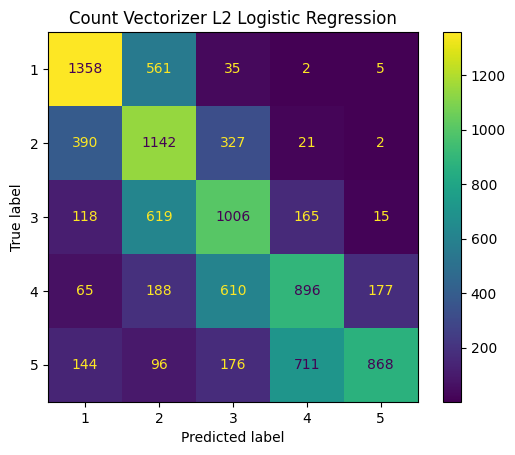

In [37]:
conmat = confusion_matrix(y_test,y_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('Count Vectorizer L2 Logistic Regression')
plt.show()

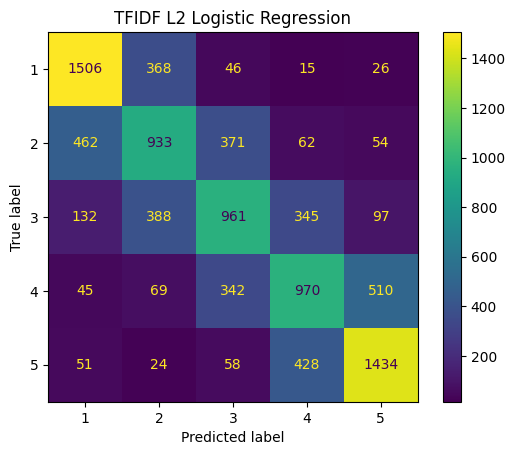

In [38]:
conmat = confusion_matrix(y_test,t_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('TFIDF L2 Logistic Regression')
plt.show()

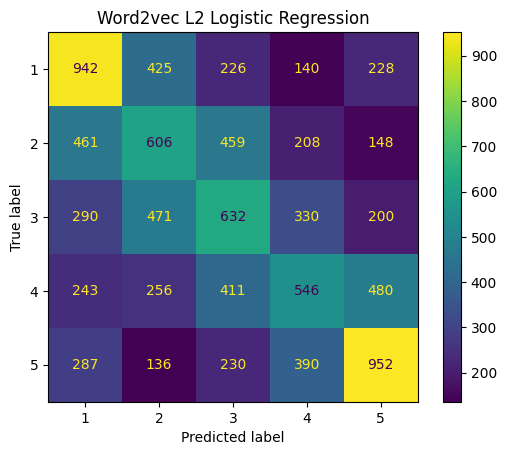

In [39]:
conmat = confusion_matrix(y_test,wtv_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('Word2vec L2 Logistic Regression')
plt.show()

In [ ]:
'''
L1 Logistic Regression
'''

In [ ]:
'''
Count Vectorizer
'''

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)
logreg = LogisticRegression(max_iter = 1500, solver = 'saga', penalty = 'l1', multi_class = 'multinomial')
logreg.fit(x_train, y_train)
cv_pred = logreg.predict(x_test)

In [ ]:
'''
tfidf
'''

In [40]:
x_train, x_test, y_train, y_test = train_test_split(xt,y, test_size=.2, random_state=42)
logreg = LogisticRegression(max_iter = 1500, solver = 'saga', penalty = 'l1', multi_class = 'multinomial')
logreg.fit(x_train, y_train)
t_pred = logreg.predict(x_test)

In [41]:
'''
word2vec
'''

'\nword2vec\n'

In [42]:
def review_vector(review):
    return np.mean([wtv.wv[word] for word in review if word in wtv.wv], axis = 0)
xw = [review_vector(review) for review in review_df['text']]
x_train, x_test, y_train, y_test = train_test_split(xw,y, test_size=.2, random_state=42)
logreg = LogisticRegression(max_iter = 1500, solver = 'saga',penalty = 'l1', multi_class = 'multinomial')
logreg.fit(x_train, y_train)
wtv_pred = logreg.predict(x_test)

c:\users\sean\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
'''
Comparing Accuracy
'''
print('count-vectorizer accuracy: ', accuracy_score(y_test, cv_pred))
print('TFIDF accuracy: ', accuracy_score(y_test, t_pred))
print('Word2Vec accuracy: ', accuracy_score(y_test, wtv_pred))

In [ ]:
'''
Confusion Matrices for L1 Logistic Regression
'''

In [ ]:
conmat = confusion_matrix(y_test,y_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('Count Vectorizer L1 Logistic Regression')
plt.show()

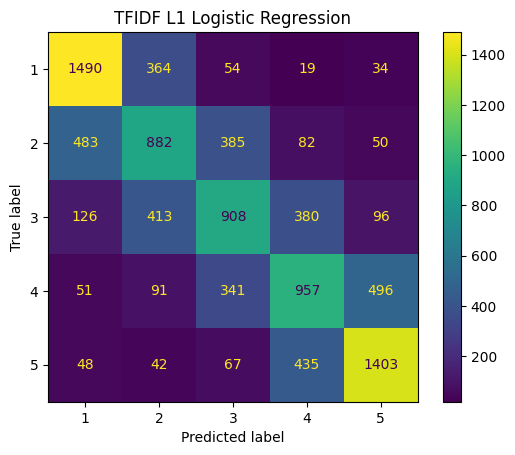

In [43]:
conmat = confusion_matrix(y_test,t_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('TFIDF L1 Logistic Regression')
plt.show()

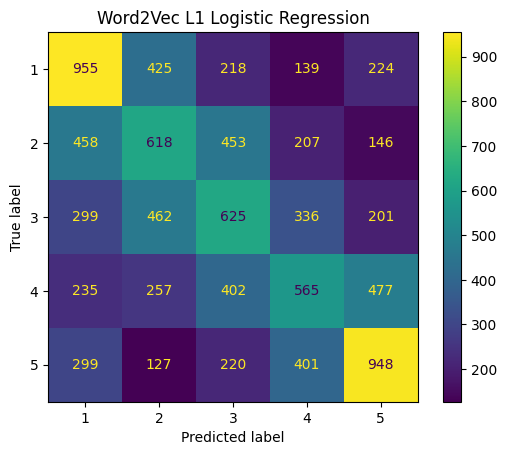

In [44]:
conmat = confusion_matrix(y_test,wtv_pred, labels=mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = mnb.classes_)
display.plot()
plt.title('Word2Vec L1 Logistic Regression')
plt.show()

In [18]:
'''
Linear SVC implementation
'''
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
lsvc = LinearSVC()

vectorizer = CountVectorizer(ngram_range=(1,3))
x = vectorizer.fit_transform(review_df['text'])

tdidf = TfidfVectorizer(ngram_range=(1,3))
xt = tdidf.fit_transform(review_df['text'])

wtv = Word2Vec(sentences = review_df['text'], vector_size=300, window=10, min_count=1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)
lsvc.fit(x_train, y_train)
cv_pred = lsvc.predict(x_test)

c:\users\sean\miniconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
x_train, x_test, y_train, y_test = train_test_split(xt,y, test_size=.2, random_state=42)
lsvc.fit(x_train, y_train)
t_pred = lsvc.predict(x_test)

In [23]:
def review_vector(review):
    return np.mean([wtv.wv[word] for word in review if word in wtv.wv], axis = 0)
xw = [review_vector(review) for review in review_df['text']]
x_train, x_test, y_train, y_test = train_test_split(xw,y, test_size=.2, random_state=42)
lsvc.fit(x_train, y_train)
wtv_pred = lsvc.predict(x_test)

In [24]:
'''
Comparing Accuracy
'''
print('count-vectorizer accuracy: ', accuracy_score(y_test, cv_pred))
print('TFIDF accuracy: ', accuracy_score(y_test, t_pred))
print('Word2Vec accuracy: ', accuracy_score(y_test, wtv_pred))

count-vectorizer accuracy:  0.5771888212849335
TFIDF accuracy:  0.6026606166855728
Word2Vec accuracy:  0.38393317520882747


In [25]:
'''
Confusion Matrices for Linear SVC
'''

'\nConfusion Matrices for Linear SVC\n'

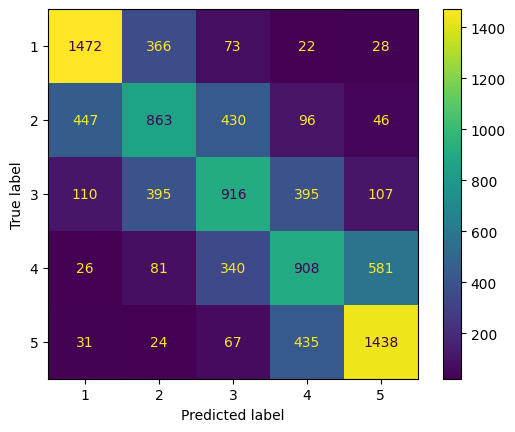

In [28]:
conmat = confusion_matrix(y_test,cv_pred, labels=lsvc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = lsvc.classes_)
display.plot()
plt.show()

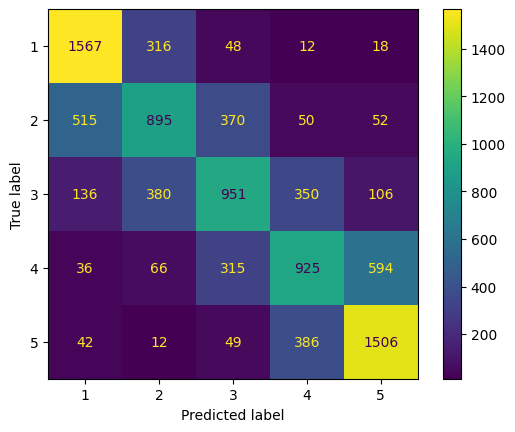

In [30]:
conmat = confusion_matrix(y_test,t_pred, labels=lsvc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = lsvc.classes_)
display.plot()
plt.show()

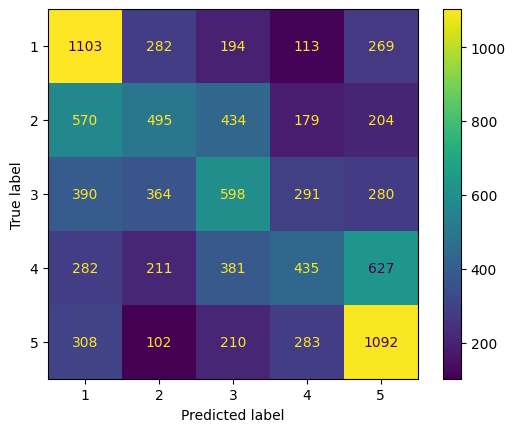

In [32]:
conmat = confusion_matrix(y_test,wtv_pred, labels=lsvc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = lsvc.classes_)
display.plot()
plt.show()